# Schelling Segregation Model

## Background

The Schelling (1971) segregation model is a classic of agent-based modeling, demonstrating how agents following simple rules lead to the emergence of qualitatively different macro-level outcomes. Agents are randomly placed on a grid. There are two types of agents, one constituting the majority and the other the minority. All agents want a certain number (generally, 3) of their 8 surrounding neighbors to be of the same type in order for them to be happy. Unhappy agents will move to a random available grid space. While individual agents do not have a preference for a segregated outcome (e.g. they would be happy with 3 similar neighbors and 5 different ones), the aggregate outcome is nevertheless heavily segregated.

## Implementation

This is a demonstration of running a Mesa model in an IPython Notebook. The actual model and agent code are implemented in Schelling.py, in the same directory as this notebook. Below, we will import the model class, instantiate it, run it, and plot the time series of the number of happy agents.

In [7]:
import numpy as np
np.__file__

import matplotlib.pyplot as plt
%matplotlib inline
import pandas as pd

import sys
import numpy as np

from model import SchoolModel

import time
import glob
import os


mesa /Users/efiathieniti/anaconda3/lib/python3.7/site-packages/Mesa-0.8.5-py3.7.egg/mesa/__init__.py
mesa /Users/efiathieniti/anaconda3/lib/python3.7/site-packages/Mesa-0.8.5-py3.7.egg/mesa/__init__.py


In [8]:
import matplotlib.pyplot as plt



Now we instantiate a model instance: a 10x10 grid, with an 80% change of an agent being placed in each cell, approximately 20% of agents set as minorities, and agents wanting at least 3 similar neighbors.

In [9]:
def get_filename_pattern():
    if factor =="alpha":
        filename_pattern="varying_%s_minority=%.2f_f0=%.2f_f1=%.2f_M0=%.2f_M1=%.2f_temp_%.2f_height_%d_steps_%d_move_%s_sym_%s_res_%d_schools_%d_den_%.2f_schell_%s_school_mps_%d_res_mps_%d_bounded_%s_radius_%d_cp_%.2f_T_%.2f"%(
            factor,minority_pc, f0, f0, M0, M1 ,temp,height, num_steps,
        move,symmetric_positions, residential_steps, num_schools, density,schelling,
        school_moves_per_step, residential_moves_per_step, bounded,radius,cap_max, T)

    if factor =='f0':
        filename_pattern="varying_%s_minority=%.2f_M0=%.2f_M1=%.2f_temp_%.2f_height_%d_steps_%d_move_%s_sym_%s_res_%d_schools_%d_alpha_%.2f_den_%.2f_schell_%s_school_mps_%d_res_mps_%d_bounded_%s_radius_%d_cp_%.2f_T_%.2f"%(
            factor,minority_pc, M0, M1, temp,height, num_steps,
        move,symmetric_positions, residential_steps, num_schools, alpha, density,schelling,
        school_moves_per_step, residential_moves_per_step, bounded, radius, cap_max, T)

    return(filename_pattern)




## Model settings

In [39]:

import time
start_time = time.time()
# your code
all_models_df = pd.DataFrame( columns={"agent_count", "seg_index", "happy","total_moves", "iter", "f0", "f1"})
all_model_agents_df = pd.DataFrame( columns={"AgentID","local_composition", "type", "id", "iter", "f0","f1"})

all_models = []
all_model_agents = []
f=0.7
all_f = [0.3,0.3,0.3,0.3,0.4,0.4,0.4,0.4,0.5,0.5,0.5,0.5,0.6,0.6,0.6,0.6]
all_alpha = [0,0.2,0.4,0.6]

alpha_idx = pd.Index([0,0.2,0.4,0.6]) 
idx = pd.Index(all_f)
f0=0.6
f1=0.6
temp=0.4
minority_pc = 0.5
all_alpha = [0.2,0.2,0.2,0.2,0.3,0.3,0.3,0.3,0.4,0.4,0.4,0.4,0.5,0.5]
all_alpha = [0.2,0.2,0.3,0.3,0.4,0.4,0.5,0.5]
all_alpha = [0.01,0.01,0.1,0.1,0.2,0.2,0.3,0.3,0.4,0.4,0.5,0.5, 0.6,0.6,0.7,0.7,0.8,0.8,0.9,0.9,0.99,0.99]

all_alpha = [0.01,0.01,0.1,0.1,0.2,0.2,0.2,0.2,0.3,0.3,0.3,0.3,0.4,0.4,0.4,0.4,0.5,0.5]
all_alpha = [0.01,0.01,0.1,0.1,0.2,0.2,0.2,0.2,0.2,0.2,0.2,0.2,0.3,0.3,0.3,0.3,0.3,0.3,0.3,0.3,0.4,0.4,0.4,0.4]
all_alpha = [0.2,0.2,0.2,0.2,0.2,0.2,0.2,0.2,0.2,0.2,0.3,0.3,0.3,0.3,0.3,0.3,0.3,0.3,0.3,0.3]
all_f0_f1 = [0.1,0.6]
all_f0_f1 = [0.4,0.5,0.6,0.70,0.8,0.9]
all_f0_f1 = [0.5,0.5,0.6,0.6,0.7,0.7,0.8,0.8,0.9,0.9]
all_f0_f1 = [0.4,0.4,0.5,0.5,0.6,0.6,0.7,0.7,0.8,0.8,0.9,0.9]
all_f0_f1 = [0.01,0.1,0.2,0.3,0.4,0.4,0.5,0.5,0.6,0.6,0.7,0.7,0.8,0.8,0.9,0.9]
all_f0_f1 = [0.7]




density = 0.90; num_schools = 64; minority_pc =  0.50; 
homophily = 3; f0 =  0.70; f1 =  0.70; M0 =  0.8; M1 =  0.8;       
alpha =  0.2; temp =  0.10; cap_max =  1.01; move = "boltzmann"; symmetric_positions = True;
schelling=False;bounded=False;radius=6; T=0.75;
school_moves_per_step=500; residential_moves_per_step=500;
i=0



num_steps=200

height=54;width=54;num_schools=16;
height=80;width=80;num_schools=64;


segregation_index= []
x2, x1 = 0,0
average_diff = 10

factor = "f0"
fs="eq"


## Run model

In [40]:

def run_simulation():
    i=0;
    all_models_df = pd.DataFrame( columns={"agent_count", "seg_index", "happy","total_moves", "iter", "f0", "f1"})
    all_model_agents_df = pd.DataFrame( columns={"AgentID","local_composition", "type", "id", "iter", "f0","f1"})
    
    for f0 in all_f0_f1:

    #for alpha in all_alpha:
        model = SchoolModel(height=height, width=width, density=density, num_schools=num_schools,minority_pc=minority_pc, homophily=3,f0=f0,f1=f0,M0=M0,
                            M1=M1 , alpha=alpha, temp=temp,cap_max=cap_max,
                           move=move, symmetric_positions=symmetric_positions, residential_steps=residential_steps,
                            schelling=schelling, bounded=bounded, residential_moves_per_step=residential_moves_per_step,
                           school_moves_per_step=school_moves_per_step,radius=radius, extended_data=True)
        
        
        
        # Stop if it did not change enough the last 70 steps

        while model.running and (model.schedule.steps < total_steps or average_diff>0.05) and model.schedule.steps<max_steps:
            model.step()
            segregation_index.append(model.seg_index)
            x2 = np.mean(segregation_index[-10:] )
            x1 = np.mean(segregation_index[-200:-190] )
            print(x2,x1)
            average_diff = (x2-x1)/x2
            print("steps ",model.schedule.steps)




        model_out = model.datacollector.get_model_vars_dataframe()
        model_out_agents = model.datacollector.get_agent_vars_dataframe()
        model_out_agents = model_out_agents[model_out_agents.type==2]
        model_out_agents = model_out_agents


        length = len(model_out)
        length_agents = len(model_out_agents)

        model_out['iter'] = np.repeat(i, length)
        model_out["f0"] = np.repeat(f0, length)
        model_out["f1"] = np.repeat(f1, length)
        model_out["alpha"] = np.repeat(alpha, length)
        model_out["res"]= np.repeat(residential_steps, length)

        model_out_agents['iter'] = np.repeat(i, length_agents)
        model_out_agents['f0'] = np.repeat(f0, length_agents)
        model_out_agents['f1'] = np.repeat(f1, length_agents)
        model_out_agents["alpha"] = np.repeat(alpha, length_agents)
        model_out_agents["res"] = np.repeat(residential_steps, length_agents)


        #all_models.append(model_out)
        all_models_df = all_models_df.append(model_out)
        all_model_agents_df = all_model_agents_df.append(model_out_agents)
        i+=1






    elapsed_time = time.time() - start_time

    all_models_df.index.name = 'Step'
    all_models_df = all_models_df.reset_index().set_index([factor, 'Step'])
    all_model_agents_df.index = pd.MultiIndex.from_tuples(all_model_agents_df.index, names=['Step', 'Id'])
    all_model_agents_df = all_model_agents_df.reset_index().set_index([factor, 'Step', 'Id'])  


    filename_pattern = get_filename_pattern()
    all_models_df.to_pickle("dataframes/all_models_df_"+ filename_pattern + time.strftime("%Y-%m-%d-%H_%M"))

    all_model_agents_df.to_pickle("dataframes/all_model_agents_df"+ filename_pattern + time.strftime("%Y-%m-%d-%H_%M"))




In [41]:
i=0;residential_steps=0;

num_steps=30;

residential_steps=120;total_steps=residential_steps+num_steps;max_steps=total_steps


all_models_df = pd.DataFrame( columns={"agent_count", "seg_index", "happy","total_moves", "iter", "f0", "f1"})
all_model_agents_df = pd.DataFrame( columns={"AgentID","local_composition", "type", "id", "iter", "f0","f1"})

for f0 in all_f0_f1:
    model = SchoolModel(height=height, width=width, density=density, num_schools=num_schools,minority_pc=minority_pc, homophily=3,f0=f0,f1=f0,M0=M0,
                        M1=M1 , alpha=alpha, temp=temp,
                       move=move, symmetric_positions=symmetric_positions, residential_steps=residential_steps,
                        schelling=schelling, bounded=bounded, residential_moves_per_step=residential_moves_per_step,
                       school_moves_per_step=school_moves_per_step,radius=radius,extended_data=True, cap_max=1.5)

    # Stop if it did not change enough the last 70 steps

    while model.running and (model.schedule.steps < total_steps or average_diff>0.05) and model.schedule.steps<max_steps:
        model.step()
        segregation_index.append(model.seg_index)
        x2 = np.mean(segregation_index[-10:] )
        x1 = np.mean(segregation_index[-200:-190] )
        print(x2,x1)
        average_diff = (x2-x1)/x2
        print("steps ",model.schedule.steps)




    model_out = model.datacollector.get_model_vars_dataframe()
    model_out_agents = model.datacollector.get_agent_vars_dataframe()
    #model_out_agents = model_out_agents[model_out_agents.type==2]
    model_out_agents = model_out_agents


    length = len(model_out)
    length_agents = len(model_out_agents)

    model_out['iter'] = np.repeat(i, length)
    model_out["f0"] = np.repeat(f0, length)
    model_out["f1"] = np.repeat(f1, length)
    model_out["alpha"] = np.repeat(alpha, length)
    model_out["res"]= np.repeat(residential_steps, length)

    model_out_agents['iter'] = np.repeat(i, length_agents)
    model_out_agents['f0'] = np.repeat(f0, length_agents)
    model_out_agents['f1'] = np.repeat(f1, length_agents)
    model_out_agents["alpha"] = np.repeat(alpha, length_agents)
    model_out_agents["res"] = np.repeat(residential_steps, length_agents)


    #all_models.append(model_out)
    all_models_df = all_models_df.append(model_out)
    all_model_agents_df = all_model_agents_df.append(model_out_agents)
    i+=1






elapsed_time = time.time() - start_time

all_models_df.index.name = 'Step'
all_models_df = all_models_df.reset_index().set_index([factor, 'Step'])
all_model_agents_df.index = pd.MultiIndex.from_tuples(all_model_agents_df.index, names=['Step', 'Id'])
all_model_agents_df = all_model_agents_df.reset_index().set_index([factor, 'Step', 'Id'])  


filename_pattern = get_filename_pattern()
all_models_df.to_pickle("dataframes/all_models_df_"+ filename_pattern + time.strftime("%Y-%m-%d-%H_%M"))

all_model_agents_df.to_pickle("dataframes/all_model_agents_df"+ filename_pattern + time.strftime("%Y-%m-%d-%H_%M"))




h x w 80 80
16
cap 90 135.0
cap 90 135.0
cap 90 135.0
cap 90 135.0
cap 90 135.0
cap 90 135.0
cap 90 135.0
cap 90 135.0
cap 90 135.0
cap 90 135.0
cap 90 135.0
cap 90 135.0
cap 90 135.0
cap 90 135.0
cap 90 135.0
cap 90 135.0
cap 90 135.0
cap 90 135.0
cap 90 135.0
cap 90 135.0
cap 90 135.0
cap 90 135.0
cap 90 135.0
cap 90 135.0
cap 90 135.0
cap 90 135.0
cap 90 135.0
cap 90 135.0
cap 90 135.0
cap 90 135.0
cap 90 135.0
cap 90 135.0
cap 90 135.0
cap 90 135.0
cap 90 135.0
cap 90 135.0
cap 90 135.0
cap 90 135.0
cap 90 135.0
cap 90 135.0
cap 90 135.0
cap 90 135.0
cap 90 135.0
cap 90 135.0
cap 90 135.0
cap 90 135.0
cap 90 135.0
cap 90 135.0
cap 90 135.0
cap 90 135.0
cap 90 135.0
cap 90 135.0
cap 90 135.0
cap 90 135.0
cap 90 135.0
cap 90 135.0
cap 90 135.0
cap 90 135.0
cap 90 135.0
cap 90 135.0
cap 90 135.0
cap 90 135.0
cap 90 135.0
cap 90 135.0
height = 80; width = 80; density = 0.90; num_schools = 64; minority_pc =  0.50; f0 =  0.70; f1 =  0.70; M0 =  0.80; M1 =  0.80;        alpha =  0.20; tem

/Users/efiathieniti/git/mesa/examples/segregation/util.py:115: RuntimeWarning: divide by zero encountered in log
  log_matrix= np.nan_to_num(np.log(pi_jm/pm))
/Users/efiathieniti/anaconda3/lib/python3.7/site-packages/numpy/core/fromnumeric.py:2920: RuntimeWarning: Mean of empty slice.
  out=out, **kwargs)
/Users/efiathieniti/anaconda3/lib/python3.7/site-packages/numpy/core/_methods.py:85: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


seg_index 0.00 var_res_seg 0.01 neighbourhood 0.01 fixed_res_seg_index 0.12 res_satisfaction 0.72 satisfaction 0.00 average_like_fixed 0.50 average_like_var 0.50
moves 0 res_moves 341 percent_happy 0
0.0 nan
steps  1
happy 0
total_considered 500
seg_index 0.00 var_res_seg 0.01 neighbourhood 0.02 fixed_res_seg_index 0.13 res_satisfaction 0.73 satisfaction 0.00 average_like_fixed 0.50 average_like_var 0.50
moves 0 res_moves 286 percent_happy 0
0.0 nan
steps  2
happy 0
total_considered 500
seg_index 0.00 var_res_seg 0.02 neighbourhood 0.03 fixed_res_seg_index 0.14 res_satisfaction 0.74 satisfaction 0.00 average_like_fixed 0.50 average_like_var 0.50
moves 0 res_moves 251 percent_happy 0
0.0 nan
steps  3
happy 0
total_considered 500
seg_index 0.00 var_res_seg 0.03 neighbourhood 0.04 fixed_res_seg_index 0.15 res_satisfaction 0.74 satisfaction 0.00 average_like_fixed 0.50 average_like_var 0.50
moves 0 res_moves 235 percent_happy 0
0.0 nan
steps  4
happy 0
total_considered 500
seg_index 0.00 v

happy 0
total_considered 500
seg_index 0.00 var_res_seg 0.54 neighbourhood 0.57 fixed_res_seg_index 0.76 res_satisfaction 0.81 satisfaction 0.00 average_like_fixed 0.50 average_like_var 0.50
moves 0 res_moves 51 percent_happy 0
0.0 nan
steps  35
happy 0
total_considered 500
seg_index 0.00 var_res_seg 0.55 neighbourhood 0.58 fixed_res_seg_index 0.77 res_satisfaction 0.82 satisfaction 0.00 average_like_fixed 0.50 average_like_var 0.50
moves 0 res_moves 39 percent_happy 0
0.0 nan
steps  36
happy 0
total_considered 500
seg_index 0.00 var_res_seg 0.56 neighbourhood 0.59 fixed_res_seg_index 0.79 res_satisfaction 0.82 satisfaction 0.00 average_like_fixed 0.50 average_like_var 0.50
moves 0 res_moves 35 percent_happy 0
0.0 nan
steps  37
happy 0
total_considered 500
seg_index 0.00 var_res_seg 0.57 neighbourhood 0.60 fixed_res_seg_index 0.80 res_satisfaction 0.82 satisfaction 0.00 average_like_fixed 0.50 average_like_var 0.50
moves 0 res_moves 37 percent_happy 0
0.0 nan
steps  38
happy 0
total_co

/Users/efiathieniti/git/mesa/examples/segregation/util.py:63: RuntimeWarning: invalid value encountered in true_divide
  pi_jm[a_ind][:] = local_composition / np.sum(local_composition)


seg_index 0.00 var_res_seg 0.72 neighbourhood 0.76 fixed_res_seg_index nan res_satisfaction 0.83 satisfaction 0.00 average_like_fixed nan average_like_var 0.50
moves 0 res_moves 10 percent_happy 0
0.0 nan
steps  61
happy 0
total_considered 500
seg_index 0.00 var_res_seg 0.72 neighbourhood 0.76 fixed_res_seg_index nan res_satisfaction 0.83 satisfaction 0.00 average_like_fixed nan average_like_var 0.50
moves 0 res_moves 10 percent_happy 0
0.0 nan
steps  62
happy 0
total_considered 500
seg_index 0.00 var_res_seg 0.73 neighbourhood 0.76 fixed_res_seg_index nan res_satisfaction 0.82 satisfaction 0.00 average_like_fixed nan average_like_var 0.50
moves 0 res_moves 11 percent_happy 0
0.0 nan
steps  63
happy 0
total_considered 500
seg_index 0.00 var_res_seg 0.73 neighbourhood 0.76 fixed_res_seg_index nan res_satisfaction 0.84 satisfaction 0.00 average_like_fixed nan average_like_var 0.50
moves 0 res_moves 7 percent_happy 0
0.0 nan
steps  64
happy 0
total_considered 500
seg_index 0.00 var_res_se

happy 0
total_considered 500
seg_index 0.00 var_res_seg 0.80 neighbourhood 0.83 fixed_res_seg_index nan res_satisfaction 0.82 satisfaction 0.00 average_like_fixed nan average_like_var 0.50
moves 0 res_moves 9 percent_happy 0
0.0 nan
steps  95
happy 0
total_considered 500
seg_index 0.00 var_res_seg 0.80 neighbourhood 0.83 fixed_res_seg_index nan res_satisfaction 0.83 satisfaction 0.00 average_like_fixed nan average_like_var 0.50
moves 0 res_moves 1 percent_happy 0
0.0 nan
steps  96
happy 0
total_considered 500
seg_index 0.00 var_res_seg 0.80 neighbourhood 0.83 fixed_res_seg_index nan res_satisfaction 0.83 satisfaction 0.00 average_like_fixed nan average_like_var 0.50
moves 0 res_moves 6 percent_happy 0
0.0 nan
steps  97
happy 0
total_considered 500
seg_index 0.00 var_res_seg 0.80 neighbourhood 0.83 fixed_res_seg_index nan res_satisfaction 0.82 satisfaction 0.00 average_like_fixed nan average_like_var 0.50
moves 0 res_moves 3 percent_happy 0
0.0 nan
steps  98
happy 0
total_considered 500

0.8260994702879257
0.8260994702879257
seg_index 0.90 var_res_seg 0.81 neighbourhood 0.84 fixed_res_seg_index 0.99 res_satisfaction 0.00 satisfaction 0.82 average_like_fixed 0.50 average_like_var 0.50
moves 511 res_moves 0 percent_happy 0
0.3842227923499158 nan
steps  127
happy 5332
total_considered 0
0.8285326844715216
0.8285326844715216
seg_index 0.95 var_res_seg 0.81 neighbourhood 0.84 fixed_res_seg_index 0.99 res_satisfaction 0.00 satisfaction 0.82 average_like_fixed 0.50 average_like_var 0.50
moves 415 res_moves 0 percent_happy 0
0.47952312928885643 nan
steps  128
happy 5412
total_considered 0
0.8314606136373104
0.8314606136373104
seg_index 0.97 var_res_seg 0.81 neighbourhood 0.84 fixed_res_seg_index 0.99 res_satisfaction 0.00 satisfaction 0.83 average_like_fixed 0.50 average_like_var 0.50
moves 334 res_moves 0 percent_happy 0
0.5761004306509321 nan
steps  129
happy 5488
total_considered 0
0.8327127347426025
0.8327127347426025
seg_index 0.98 var_res_seg 0.81 neighbourhood 0.84 fixe

/Users/efiathieniti/anaconda3/lib/python3.7/site-packages/pandas/core/frame.py:6692: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.

  sort=sort)


In [42]:
filename_pattern = get_filename_pattern()
filename_pattern_to_find= filename_pattern + '*'

# Agents utilities for candidates 
for name in glob.glob("dataframes/all_model_agents_df" + filename_pattern_to_find):
    print(name)
    
    new_df = pd.read_pickle(name)

dataframes/all_model_agents_dfvarying_f0_minority=0.50_M0=0.80_M1=0.80_temp_0.10_height_80_steps_30_move_boltzmann_sym_True_res_120_schools_64_alpha_0.20_den_0.90_schell_False_school_mps_500_res_mps_500_bounded_False_radius_6_cp_1.01_T_0.752019-08-27-15_56


In [43]:
print(filename_pattern_to_find)

varying_f0_minority=0.50_M0=0.80_M1=0.80_temp_0.10_height_80_steps_30_move_boltzmann_sym_True_res_120_schools_64_alpha_0.20_den_0.90_schell_False_school_mps_500_res_mps_500_bounded_False_radius_6_cp_1.01_T_0.75*


In [44]:
all_model_agents_df = new_df

In [45]:
all_model_agents_df = all_model_agents_df.reset_index()


In [46]:
all_model_agents_df['school_step'] = all_model_agents_df['Step'] -all_model_agents_df['res']


In [47]:
house_agents = all_model_agents_df[all_model_agents_df.type.isin([0,1])]


In [48]:
house_agents

,f0,Step,Id,AgentID,alpha,f1,id,iter,local_composition,pos,res,residential_utilities,school_utilities,type,school_step
64,0.7,0,"(67, 57)",NaN,0.2,0.7,"(67, 57)",0,None,"(67, 57)",120.0,[],[],1,-120.0
65,0.7,0,"(30, 44)",NaN,0.2,0.7,"(30, 44)",0,None,"(30, 44)",120.0,[],[],1,-120.0
66,0.7,0,"(34, 46)",NaN,0.2,0.7,"(34, 46)",0,None,"(34, 46)",120.0,[],[],1,-120.0
67,0.7,0,"(15, 40)",NaN,0.2,0.7,"(15, 40)",0,None,"(15, 40)",120.0,[],[],1,-120.0
68,0.7,0,"(57, 17)",NaN,0.2,0.7,"(57, 17)",0,None,"(57, 17)",120.0,[],[],1,-120.0
69,0.7,0,"(78, 77)",NaN,0.2,0.7,"(78, 77)",0,None,"(78, 77)",120.0,[],[],1,-120.0
70,0.7,0,"(35, 18)",NaN,0.2,0.7,"(35, 18)",0,None,"(35, 18)",120.0,[],[],1,-120.0
71,0.7,0,"(64, 31)",NaN,0.2,0.7,"(64, 31)",0,None,"(64, 31)",120.0,[],[],1,-120.0
72,0.7,0,"(63, 58)",NaN,0.2,0.7,"(63, 58)",0,None,"(63, 58)",120.0,[],[],1,-120.0
73,0.7,0,"(20, 43)",NaN,0.2,0.7,"(20, 43)",0,None,"(20, 43)",120.0,[],[],1,-120.0


In [49]:
util = 'residential_utilities'

for Step in [1,10,20,50,60]:
    utilities = house_agents[(house_agents.astype(str)[util] != '[]' )& (house_agents.Step==Step)]
    utilities = utilities[util]
    plt.hist(utilities.iloc[0])
    plt.show()
    
    util = 'residential_utilities'


SyntaxError: invalid syntax (<ipython-input-49-e6058567debd>, line 7)

In [ ]:
from scipy.stats import entropy

In [50]:
def get_average_entropy(utilities):
    entropies = []
    
    for x in utilities:
        hist1 = np.histogram(x, density=True)
        data = hist1[0]
        entropies.append(entropy(data))
    return(np.nanmean(entropies))

/Users/efiathieniti/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:8: RuntimeWarning: Mean of empty slice
  


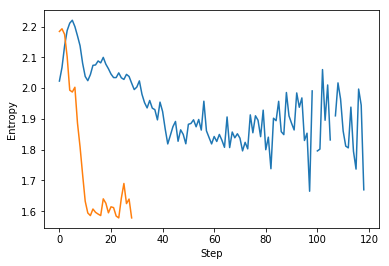

In [54]:

util = 'residential_utilities'
entropies = []
for Step in range(1,120):
    utilities = house_agents[(house_agents.astype(str)[util] != '[]' )& (house_agents.Step==Step)]
    utilities = utilities[util]
    
    entropies.append(get_average_entropy(utilities))

plt.plot(entropies)
plt.xlabel("Step")
plt.ylabel("Entropy")
plt.savefig("Entropy_per_step_%s_final.png"%util)

 
util = 'school_utilities'
entropies = []
for Step in range(1,30):
    utilities = house_agents[(house_agents.astype(str)[util] != '[]' )& (house_agents.school_step==Step)]
    utilities = utilities[util]
    
    entropies.append(get_average_entropy(utilities))

plt.plot(entropies)
plt.xlabel("Step")
plt.ylabel("Entropy")
plt.savefig("Entropy_per_step_%s_final_both.png"%util)
plt.show()
 


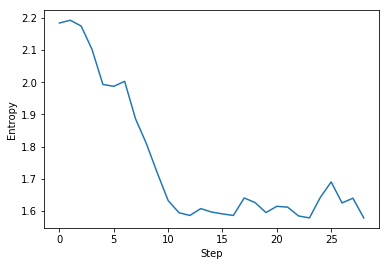

In [53]:
util = 'school_utilities'
entropies = []
for Step in range(1,30):
    utilities = house_agents[(house_agents.astype(str)[util] != '[]' )& (house_agents.school_step==Step)]
    utilities = utilities[util]
    
    entropies.append(get_average_entropy(utilities))

plt.plot(entropies)
plt.xlabel("Step")
plt.ylabel("Entropy")
plt.savefig("Entropy_per_step_%s_final.png"%util)
plt.show()
 


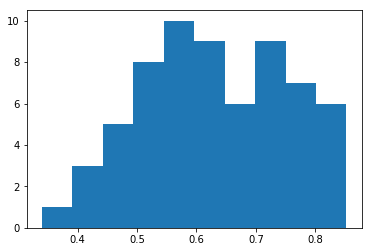

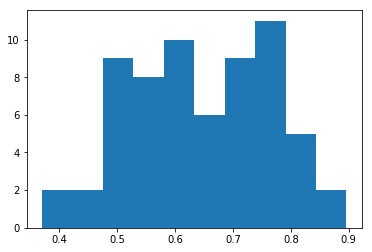

-125.73399893254748

In [26]:
util = 'school_utilities'
Step=1
utilities = house_agents[(house_agents.astype(str)[util] != '[]' )& (house_agents.school_step==Step)]
utilities = utilities[util]

# plt.xlabel("Step=%d"%Step)
plt.hist(utilities.iloc[0])
plt.show()
util = 'school_utilities'

Step=2

utilities = house_agents[(house_agents.astype(str)[util] != '[]' )& (house_agents.school_step==Step)]
utilities = utilities[util]

plt.hist(utilities.iloc[500])
# plt.xlabel("Step=%d"%Step)

plt.show()

hist1 = np.histogram(utilities.iloc[0])
data = hist1[0]
ent = -(data*np.log(np.abs(data))).sum()
ent

# Entropy


In [ ]:
from scipy import 

# Histogram of agents probabilities

In [2]:
plt.hist(model_out.pi_jm[1][:,0], alpha=0.5, label="radius=1")
plt.hist(model_out.pi_jm_fixed[1][:,0], alpha=0.5, label="radius=6")
plt.vlines(x=0.6, linestyles='--',ymin=0, ymax=900)
plt.legend()
plt.show()

plt.hist(model_out.pi_jm[residential_steps][:,0], alpha=0.5, label="var")
plt.hist(model_out.pi_jm_fixed[residential_steps][:,0], alpha=0.5, label="fixed")
plt.legend()


NameError: name 'plt' is not defined

# Plot the agents probabilities

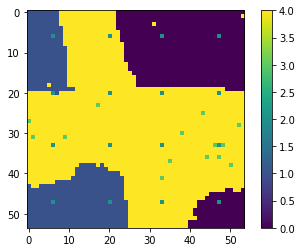

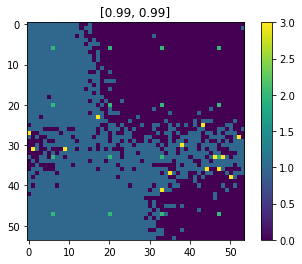

In [29]:
import numpy as np

agent_types = np.zeros((model.grid.width, model.grid.height))
for cell in model.grid.coord_iter():
    agent_content, x, y = cell
    if agent_content:
        agent_type = agent_content.type
        #agent_like[x][y] = agent_content.variable_local_composition[:,0]
        if agent_type in [0,1]:
            local_composition = agent_content.variable_local_composition
            variable_local_comp = local_composition / np.sum(local_composition)
            if variable_local_comp[0]<0.95:
                agent_type=4
        agent_types[x][y] = agent_type


    else:
        # add this for empty cells
        agent_types[x][y] = 3
    
              
plt.imshow(agent_types, interpolation='nearest')
plt.colorbar()

plt.show()
agent_types = np.zeros((model.grid.width, model.grid.height))
for cell in model.grid.coord_iter():
    agent_content, x, y = cell
    if agent_content:
        agent_type = agent_content.type
        agent_types[x][y] = agent_type


    else:
        # add this for empty cells
        agent_types[x][y] = 3
    
              
plt.imshow(agent_types, interpolation='nearest' )




plt.title(model.f)
plt.colorbar()


In [15]:
agent_content.variable_local_composition

(47, 0)

In [11]:
agent_types

array([[1., 1., 1., ..., 0., 0., 0.],
       [1., 1., 1., ..., 0., 0., 1.],
       [1., 1., 1., ..., 0., 0., 0.],
       ...,
       [1., 1., 1., ..., 0., 0., 0.],
       [1., 1., 1., ..., 0., 0., 0.],
       [1., 1., 1., ..., 0., 0., 0.]])

In [9]:
num_steps=200

residential_steps=120;total_steps =residential_steps+num_steps;max_steps=total_steps+200
run_simulation()
run_simulation()
run_simulation()




TypeError: __init__() got an unexpected keyword argument 'alpha'

In [ ]:

residential_steps =120;
total_steps =residential_steps+num_steps
max_steps=total_steps+200
run_simulation()



In [ ]:
num_steps=200
residential_steps =120;
total_steps =residential_steps+num_steps
max_steps=total_steps+200
run_simulation()



residential_steps =120;
total_steps =residential_steps+num_steps
max_steps=total_steps+200
run_simulation()

i=0; residential_steps =0;
total_steps =residential_steps+num_steps
max_steps=total_steps+200
run_simulation()

In [ ]:

i=0; residential_steps =120;

total_steps =residential_steps+num_steps
max_steps=total_steps+200
run_simulation()



i=0; residential_steps =120;
total_steps =residential_steps+num_steps
max_steps=total_steps+200
run_simulation()

i=0; residential_steps =0;
total_steps =residential_steps+num_steps
max_steps=total_steps+200
run_simulation()

In [ ]:
num_steps=200
i=0; residential_steps =120;
total_steps =residential_steps+num_steps
max_steps=total_steps+200
run_simulation()



i=0; residential_steps =120;
total_steps =residential_steps+num_steps
max_steps=total_steps+200
run_simulation()

i=0; residential_steps =0;
total_steps =residential_steps+num_steps
max_steps=total_steps+200
run_simulation()

In [ ]:
num_steps=120
i=0; residential_steps =0;
total_steps =residential_steps+num_steps
max_steps=total_steps+20
run_simulation()

## Load previous simulations

In [245]:
T=0.74;radius=5;cap_max=1.01
#radius=7
#cap_max=1.01
filename_pattern = get_filename_pattern()
filename_pattern


'varying_f0_minority=0.50_M0=0.80_M1=0.80_temp_0.10_height_100_steps_200_move_boltzmann_sym_True_res_120_schools_64_alpha_0.20_den_0.99_schell_False_school_mps_500_res_mps_500_bounded_False_radius_5_cp_1.01_T_0.74'

In [36]:
compare = 'res'
dfs = []
i=0
residential_steps =0;
total_steps =residential_steps+num_steps
max_steps=total_steps+20

filename_pattern = get_filename_pattern()
filename_pattern_to_find= filename_pattern + '*'

for name in glob.glob("dataframes/all_models_df_" + filename_pattern_to_find):
    print(name)
    
    new_df = pd.read_pickle(name)
    new_df["res"] = np.repeat(residential_steps, len(new_df))
    new_df["iter1"] = np.repeat(i, len(new_df))
    new_df["move"] = np.repeat(move, len(new_df))

    dfs.append(new_df)
    i+=1
 


residential_steps=120

filename_pattern = get_filename_pattern()
filename_pattern_to_find= filename_pattern + '*'

for name in glob.glob("dataframes/all_models_df_"+ filename_pattern_to_find):
    print(name)
    new_df = pd.read_pickle(name)
    new_df["res"] = np.repeat(residential_steps, len(new_df))
    new_df["iter1"] = np.repeat(i, len(new_df))
    new_df["move"] = np.repeat(move, len(new_df))

    #if len(new_df)>=num_steps:
    dfs.append(new_df)
    i+=1
all_models_df=pd.concat(dfs)

compare = "move"
compare = "radius"
# move='deterministic'
# residential_steps=0
# M0=1.0 ;M1=1.0
# num_steps=280
# filename_pattern = get_filename_pattern()
# filename_pattern_to_find= filename_pattern + '*'

# for name in glob.glob("dataframes/all_models_df_" + filename_pattern_to_find):
#     print(name)
    
#     new_df = pd.read_pickle(name)
#     new_df["res"] = np.repeat(residential_steps, len(new_df))
#     new_df["iter1"] = np.repeat(i, len(new_df))
#     new_df["move"] = np.repeat(move, len(new_df))

#     dfs.append(new_df)
#     i+=1
 


# residential_steps=200
# M0=1 ;M1=1
# num_steps=400


# filename_pattern = get_filename_pattern()
# filename_pattern_to_find= filename_pattern + '*'

# for name in glob.glob("dataframes/all_models_df_"+ filename_pattern_to_find):
#     print(name)
#     new_df = pd.read_pickle(name)
#     new_df["res"] = np.repeat(residential_steps, len(new_df))
#     new_df["iter1"] = np.repeat(i, len(new_df))
#     new_df["move"] = np.repeat(move, len(new_df))

#     #if len(new_df)>=num_steps:
#     dfs.append(new_df)
#     i+=1
# all_models_df=pd.concat(dfs)

# all_models_df=all_models_df.reset_index()
# #all_models_df = all_models_df.drop(columns=factor).reset_index()


ValueError: No objects to concatenate